In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error, log_loss
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.pipeline import  make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf

from pathlib import Path
from time import strftime

In [2]:
iris = load_iris(as_frame=True)
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = (iris.target == 0) # setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)

In [2]:
# sklearn implementaion
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50,50,50], random_state=42) # three hidden layers each
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)

rmse = root_mean_squared_error(y_valid, y_pred)
print(rmse)

0.5053326657968588


In [4]:
iris = load_iris(as_frame=True)
X = iris.data[['petal width (cm)', 'petal length (cm)']].values
y = (iris.target == 0)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[50,50,50], random_state=42, verbose=True)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict_proba(X_valid)
x_entropy = log_loss(y_valid, y_pred)
print(x_entropy)


Iteration 1, loss = 0.64878217
Iteration 2, loss = 0.62521621
Iteration 3, loss = 0.60262438
Iteration 4, loss = 0.58093986
Iteration 5, loss = 0.56038341
Iteration 6, loss = 0.54040324
Iteration 7, loss = 0.52162517
Iteration 8, loss = 0.50348359
Iteration 9, loss = 0.48568728
Iteration 10, loss = 0.46896736
Iteration 11, loss = 0.45338472
Iteration 12, loss = 0.43805657
Iteration 13, loss = 0.42288916
Iteration 14, loss = 0.40798801
Iteration 15, loss = 0.39358182
Iteration 16, loss = 0.37943181
Iteration 17, loss = 0.36542432
Iteration 18, loss = 0.35151472
Iteration 19, loss = 0.33758809
Iteration 20, loss = 0.32380489
Iteration 21, loss = 0.31028353
Iteration 22, loss = 0.29702492
Iteration 23, loss = 0.28403963
Iteration 24, loss = 0.27139038
Iteration 25, loss = 0.25929616
Iteration 26, loss = 0.24771068
Iteration 27, loss = 0.23648726
Iteration 28, loss = 0.22565096
Iteration 29, loss = 0.21528325
Iteration 30, loss = 0.20519848
Iteration 31, loss = 0.19537750
Iteration 32, los

In [2]:
# implementing MLPs with Keras
# Building an imake classifier using the sequential API

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [3]:
# since pixel intensities are in 255 scale scale it down dividing by 255

X_train, X_test, X_valid = X_train/255, X_test/255, X_valid/255
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Ankle boot'

In [4]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(), # input layer 
    tf.keras.layers.Dense(300, activation="relu"), # hidden layer
    tf.keras.layers.Dense(100, activation="relu"), # hidden layer
    tf.keras.layers.Dense(10, activation="softmax") #output layer
])

In [15]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.layers

[<Flatten name=flatten_3, built=True>,
 <Dense name=dense_9, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=dense_11, built=True>]

In [18]:
hidden1 = model.layers[1]
hidden1.name

'dense_9'

In [19]:
model.get_layer('dense_9') is hidden1

True

In [21]:
weights, biases = hidden1.get_weights()
weights.shape

(784, 300)

In [22]:
biases.shape

(300,)

In [24]:
# after a model is created, you must call its compile() to specify the loss
# function and the optimizer to use

model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer = tf.keras.optimizers.SGD(), 
              metrics = [tf.keras.metrics.sparse_categorical_accuracy])

In [32]:
# training the model and evaluating the model

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 572us/step - loss: 0.2197 - sparse_categorical_accuracy: 0.9223 - val_loss: 0.3357 - val_sparse_categorical_accuracy: 0.8808
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 578us/step - loss: 0.2160 - sparse_categorical_accuracy: 0.9242 - val_loss: 0.3369 - val_sparse_categorical_accuracy: 0.8804
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 587us/step - loss: 0.2122 - sparse_categorical_accuracy: 0.9260 - val_loss: 0.3377 - val_sparse_categorical_accuracy: 0.8792
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 583us/step - loss: 0.2086 - sparse_categorical_accuracy: 0.9275 - val_loss: 0.3390 - val_sparse_categorical_accuracy: 0.8790
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 567us/step - loss: 0.2051 - sparse_categorical_accuracy: 0.9289 - val_loss: 0.3381 - val_sparse_categorical_accuracy: 0.8810
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 563us/step - loss: 0.2016 - sparse_categorical_accuracy: 0.9295 - val_loss: 0.3382 - val_sparse_categoric

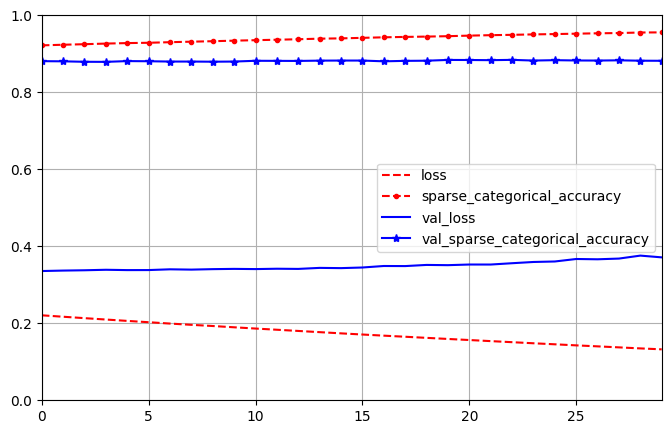

In [33]:
pd.DataFrame(history.history).plot(
    figsize=(8,5), xlim=[0,29], ylim=[0,1], grid=True,
    style=['r--', 'r--.', 'b-', 'b-*']
)
plt.show()

In [34]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - loss: 0.3883 - sparse_categorical_accuracy: 0.8760


[0.3782989978790283, 0.8791000247001648]

In [35]:
# making predicitons
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [36]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [38]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [56]:
tf.random.set_seed(42)

norm_layer = tf.keras.layers.Normalization()

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1:]),
    norm_layer,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
model.compile(loss=tf.keras.losses.MSE, optimizer=optimizer,
              metrics = [tf.keras.metrics.RootMeanSquaredError])

norm_layer.adapt(X_train)

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)

Epoch 1/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 552us/step - loss: 0.9285 - root_mean_squared_error: 0.9270 - val_loss: 0.6299 - val_root_mean_squared_error: 0.7937
Epoch 2/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - loss: 0.4053 - root_mean_squared_error: 0.6364 - val_loss: 0.3495 - val_root_mean_squared_error: 0.5912
Epoch 3/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - loss: 0.3715 - root_mean_squared_error: 0.6093 - val_loss: 0.3254 - val_root_mean_squared_error: 0.5704
Epoch 4/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - loss: 0.3506 - root_mean_squared_error: 0.5920 - val_loss: 0.3022 - val_root_mean_squared_error: 0.5497
Epoch 5/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - loss: 0.3384 - root_mean_squared_error: 0.5816 - val_loss: 0.2900 - val_root_mean_squared_error: 0.5385
Epoch 6/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - loss: 0.3408 - root_mean_squared_error: 0.5836 - val_loss: 0.3121 - val_root_mean_squared_error: 0.5586
Epoch 7/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 

In [57]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[0.5175074],
       [1.2859372],
       [4.946061 ]], dtype=float32)

In [58]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_4 (Normalization) │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,822 (65.72 KB)

 Trainable params: 5,601 (21.88 KB)

 Non-trainable params: 17 (72.00 B)

 Optimizer params: 11,204 (43.77 KB)

<Axes: >

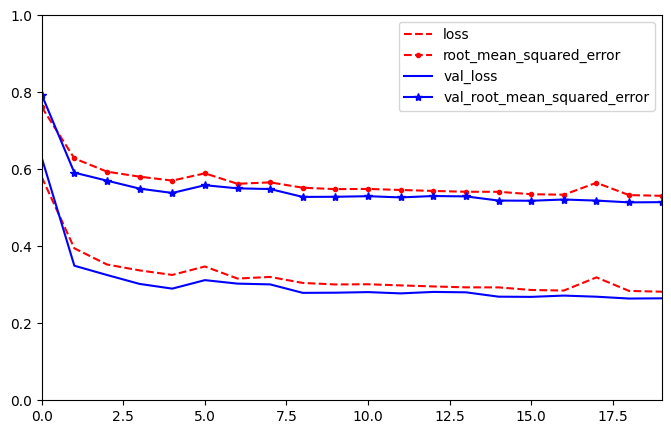

In [59]:
pd.DataFrame(history.history).plot(
    figsize=[8,5], xlim=[0, 19], ylim=[0,1],
    style=['r--', 'r--.', 'b-', 'b-*']
)

In [4]:
# functional APIs
# wide and deep neural network

# model layers
normalization_layers = tf.keras.layers.Normalization()
hidden_layers1 = tf.keras.layers.Dense(500, activation='relu')
hidden_layers2 = tf.keras.layers.Dense(500, activation='relu')
concat_layers =  tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layers(input_)
hidden1 = hidden_layers1(normalized)
hidden2 = hidden_layers2(hidden1)
concat = concat_layers([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs = [input_], outputs = [output])

model.compile(loss=tf.keras.losses.MSE, optimizer= tf.keras.optimizers.Adam(learning_rate=1e-5),
              metrics = [tf.keras.metrics.RootMeanSquaredError])

normalization_layers.adapt(X_train)

history = model.fit(X_train, y_train, epochs=30, validation_data=[X_valid, y_valid])

model.evaluate(X_test, y_test)

Epoch 1/30


/Users/chiragbangera/Developer/Handsonml/.venv/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 8))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.0766 - root_mean_squared_error: 2.0147 - val_loss: 24.1294 - val_root_mean_squared_error: 4.9122
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7803 - root_mean_squared_error: 1.3336 - val_loss: 22.8348 - val_root_mean_squared_error: 4.7786
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0932 - root_mean_squared_error: 1.0452 - val_loss: 18.1341 - val_root_mean_squared_error: 4.2584
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9403 - root_mean_squared_error: 0.9688 - val_loss: 14.5477 - val_root_mean_squared_error: 3.8141
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8747 - root_mean_squared_error: 0.9343 - val_loss: 11.6634 - val_root_mean_squared_error: 3.4152
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8855 - root_mean_squared_error: 0.9382 - val_loss: 9.2099 - val_root_mean_squared_error: 3.0348
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss

[0.3592126667499542, 0.5993435382843018]

<Axes: >

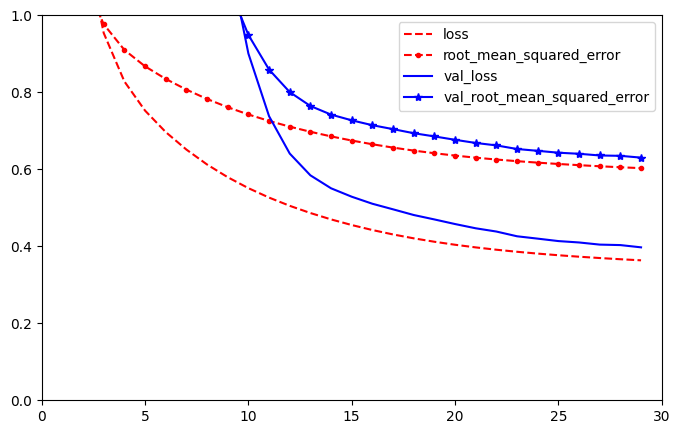

In [81]:
pd.DataFrame(history.history).plot(
    figsize=[8,5], xlim=[0, 30], ylim=[0,1],
    style=['r--', 'r--.', 'b-', 'b-*']
)

In [5]:
# splitting the input features between wide and deep

input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])
normal_wide = tf.keras.layers.Normalization()
normal_deep = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(20, activation='relu')
hidden_layer2 = tf.keras.layers.Dense(20, activation='relu')
concat_layer =tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

normalized_wide = normal_wide(input_wide)
normalized_deep = normal_deep(input_deep)

hidden1 = hidden_layer1(normalized_deep)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized_deep, hidden2])
output = output_layer(concat)
model = tf.keras.Model(inputs = [input_wide, input_deep], outputs = [output])

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])


In [3]:
X_train_wide, X_train_deep = X_train[:, :5], X_train[:,2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:,2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:,2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

In [7]:
normal_wide.adapt(X_train_wide)
normal_deep.adapt(X_train_deep)

history = model.fit((X_train_wide, X_train_deep), y_train,epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))
print(mse_test)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - RootMeanSquaredError: 2.0062 - loss: 4.1706 - val_RootMeanSquaredError: 1.1569 - val_loss: 1.3385
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - RootMeanSquaredError: 0.8959 - loss: 0.8033 - val_RootMeanSquaredError: 0.8924 - val_loss: 0.7964
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - RootMeanSquaredError: 0.7796 - loss: 0.6080 - val_RootMeanSquaredError: 0.8000 - val_loss: 0.6400
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - RootMeanSquaredError: 0.7460 - loss: 0.5566 - val_RootMeanSquaredError: 0.8718 - val_loss: 0.7601
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - RootMeanSquaredError: 0.7363 - loss: 0.5424 - val_RootMeanSquaredError: 0.7702 - val_loss: 0.5931
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - RootMeanSquaredError: 0.7053 - loss: 0.4978 - val_RootMeanSquaredError: 0.8921 - val_loss: 0.7958
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - RootMeanSquaredError

In [19]:
# auxilary layers output model

input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])
norm_wide = tf.keras.layers.Normalization()
norm_deep = tf.keras.layers.Normalization()

norm_wide_layer = norm_wide(input_wide)
norm_deep_layer = norm_deep(input_deep)

hidden1 = tf.keras.layers.Dense(20, activation="relu")(norm_deep_layer)
hidden2 = tf.keras.layers.Dense(20, activation="relu")(hidden1)

concat = tf.keras.layers.concatenate([norm_wide_layer, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs = [input_wide, input_deep], 
                       outputs = [output, aux_output])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=('mse', 'mse'), optimizer=optimizer, loss_weights=(0.9, 0.1),
              metrics = ['RootMeanSquaredError','RootMeanSquaredError'])

norm_wide.adapt(X_train_wide)
norm_deep.adapt(X_train_deep)

In [20]:
history = model.fit((X_train_wide, X_train_deep), (y_train, y_train),
                    epochs=20, validation_data= ((X_valid_wide, X_valid_deep), (y_valid, y_valid)))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step - dense_28_RootMeanSquaredError: 2.3139 - dense_28_loss: 5.5597 - dense_29_RootMeanSquaredError: 2.0145 - dense_29_loss: 4.1433 - loss: 5.4180 - val_dense_28_RootMeanSquaredError: 0.9651 - val_dense_28_loss: 0.9313 - val_dense_29_RootMeanSquaredError: 1.3635 - val_dense_29_loss: 1.8585 - val_loss: 1.0243
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - dense_28_RootMeanSquaredError: 0.8823 - dense_28_loss: 0.7793 - dense_29_RootMeanSquaredError: 0.9136 - dense_29_loss: 0.8356 - loss: 0.7850 - val_dense_28_RootMeanSquaredError: 0.8080 - val_dense_28_loss: 0.6527 - val_dense_29_RootMeanSquaredError: 1.2100 - val_dense_29_loss: 1.4635 - val_loss: 0.7340
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - dense_28_RootMeanSquaredError: 0.7444 - dense_28_loss: 0.5542 - dense_29_RootMeanSquaredError: 0.7739 - dense_29_loss: 0.5991 - loss: 0.5587 - val_dense_28_RootMeanSquaredError: 0.9143 - val_dense_28_loss: 0.8356 - val_dense

In [22]:
eval_results = model.evaluate((X_test_wide, X_test_deep),(y_test, y_test), return_dict=True)
# weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results
print(eval_results)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - dense_28_RootMeanSquaredError: 0.5861 - dense_28_loss: 0.3435 - dense_29_RootMeanSquaredError: 0.6444 - dense_29_loss: 0.4154 - loss: 0.3507
{'dense_28_RootMeanSquaredError': 0.5870016813278198, 'dense_28_loss': 0.3445166349411011, 'dense_29_RootMeanSquaredError': 0.6425354480743408, 'dense_29_loss': 0.4137413501739502, 'loss': 0.3513992130756378}


In [23]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))
print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
{'dense_28': array([[0.37133867],
       [1.6369907 ],
       [3.3881972 ]], dtype=float32), 'dense_29': array([[0.6929004],
       [1.6245914],
       [2.8902411]], dtype=float32)}


In [4]:
# Subclassing API to Build Dynamic Models
@tf.keras.utils.register_keras_serializable()
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units = 30, activation = 'relu', **kwargs):
        super().__init__(**kwargs) #needed to support naming the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
        
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output
    
model = WideAndDeepModel(30, activation='relu', name = 'my_cool_model')

model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)

optimizer = tf.keras.optimizers.Adam(learning_rate = 2e-3)

model.compile(loss=('mse', 'mse'), optimizer = optimizer, loss_weights=(0.9, 0.1),
              metrics = ['RootMeanSquaredError', 'RootMeanSquaredError'])

history = model.fit((X_train_wide, X_train_deep), (y_train, y_train), epochs=30,
          validation_data = ((X_valid_wide, X_valid_deep), (y_valid, y_valid)))

model_mse = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test), return_dict=True)
print(model_mse)

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step - RootMeanSquaredError: 1.2058 - RootMeanSquaredError_1: 1.7710 - loss: 1.7153 - mse_loss: 3.2798 - val_RootMeanSquaredError: 0.9668 - val_RootMeanSquaredError_1: 1.0117 - val_loss: 0.9436 - val_mse_loss: 1.0233
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - RootMeanSquaredError: 0.6487 - RootMeanSquaredError_1: 0.7881 - loss: 0.4410 - mse_loss: 0.6213 - val_RootMeanSquaredError: 0.6164 - val_RootMeanSquaredError_1: 0.7633 - val_loss: 0.4002 - val_mse_loss: 0.5825
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - RootMeanSquaredError: 0.6279 - RootMeanSquaredError_1: 0.7376 - loss: 0.4094 - mse_loss: 0.5442 - val_RootMeanSquaredError: 1.2072 - val_RootMeanSquaredError_1: 0.8328 - val_loss: 1.3809 - val_mse_loss: 0.6933
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - RootMeanSquaredError: 0.6347 - RootMeanSquaredError_1: 0.7425 - loss: 0.4179 - mse_loss: 0.5518 - val_RootMeanSquaredError: 1.6390 - val_RootMeanS

In [32]:
model.save('my_keras_model.keras')


In [35]:
model = tf.keras.models.load_model('my_keras_model.keras')
y_pred, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [5]:
# using callbacks
# checkpoint is call back
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('my_checkpoints.weights.h5', save_weights_only=True, save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit((X_train_wide, X_train_deep), (y_train, y_train), 
                    epochs=10, 
                    validation_data= ((X_valid_wide, X_valid_deep), (y_valid, y_valid)), 
                    callbacks=[checkpoint_cb, early_stopping])

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - RootMeanSquaredError: 0.5520 - RootMeanSquaredError_1: 0.5982 - loss: 0.3102 - mse_loss: 0.3582 - val_RootMeanSquaredError: 0.5747 - val_RootMeanSquaredError_1: 0.6205 - val_loss: 0.3357 - val_mse_loss: 0.3850
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - RootMeanSquaredError: 0.5356 - RootMeanSquaredError_1: 0.5814 - loss: 0.2921 - mse_loss: 0.3382 - val_RootMeanSquaredError: 0.5887 - val_RootMeanSquaredError_1: 0.6324 - val_loss: 0.3520 - val_mse_loss: 0.3999
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - RootMeanSquaredError: 0.5500 - RootMeanSquaredError_1: 0.5906 - loss: 0.3074 - mse_loss: 0.3493 - val_RootMeanSquaredError: 1.0780 - val_RootMeanSquaredError_1: 1.1575 - val_loss: 1.1798 - val_mse_loss: 1.3393
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - RootMeanSquaredError: 0.5305 - RootMeanSquaredError_1: 0.5763 - loss: 0.2868 - mse_loss: 0.3323 - val_RootMeanSquaredError: 0.5948 - val_RootMeanS

In [6]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs['val_loss'] / logs['loss']
        print(f"Epoch={epoch}, val/train={ratio:.2f}")

In [7]:
def get_run_logdir(root_logdir='my_logs'):
    return Path(root_logdir) / strftime('run_%Y_%m_%d_%H_%M_%S')

run_logdir = get_run_logdir()

In [8]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir, profile_batch=(100, 200))
history = model.fit((X_train_wide, X_train_deep), (y_train,y_train),
                    epochs = 10,
                    validation_data = ((X_valid_wide, X_valid_deep),
                                       (y_valid, y_valid)),
                    callbacks = [tensorboard_cb])

Epoch 1/10
119/363 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - RootMeanSquaredError: 0.5371 - RootMeanSquaredError_1: 0.5646 - loss: 0.2917 - mse_loss: 0.3190

2025-01-11 23:27:07.267625: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2025-01-11 23:27:07.267652: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
2025-01-11 23:27:07.268300: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:130] Profiler session tear down.
2025-01-11 23:27:07.424572: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2025-01-11 23:27:07.424585: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.


363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - RootMeanSquaredError: 0.5381 - RootMeanSquaredError_1: 0.5730 - loss: 0.2935 - mse_loss: 0.3284 - val_RootMeanSquaredError: 0.6152 - val_RootMeanSquaredError_1: 0.7756 - val_loss: 0.4008 - val_mse_loss: 0.6013
Epoch 2/10
128/363 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - RootMeanSquaredError: 0.5231 - RootMeanSquaredError_1: 0.5644 - loss: 0.2783 - mse_loss: 0.3188

2025-01-11 23:27:07.471219: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:68] Profiler session collecting data.
2025-01-11 23:27:07.482600: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:130] Profiler session tear down.
2025-01-11 23:27:07.484960: I external/local_xla/xla/tsl/profiler/rpc/client/save_profile.cc:147] Collecting XSpace to repository: my_logs/run_2025_01_11_23_27_06/train/plugins/profile/2025_01_11_23_27_07/Chirags-Mac-mini.local.xplane.pb


363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - RootMeanSquaredError: 0.5412 - RootMeanSquaredError_1: 0.5833 - loss: 0.2979 - mse_loss: 0.3406 - val_RootMeanSquaredError: 0.5450 - val_RootMeanSquaredError_1: 0.6531 - val_loss: 0.3100 - val_mse_loss: 0.4265
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - RootMeanSquaredError: 0.5393 - RootMeanSquaredError_1: 0.5826 - loss: 0.2958 - mse_loss: 0.3395 - val_RootMeanSquaredError: 0.5317 - val_RootMeanSquaredError_1: 0.6152 - val_loss: 0.2923 - val_mse_loss: 0.3784
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - RootMeanSquaredError: 0.5356 - RootMeanSquaredError_1: 0.5750 - loss: 0.2914 - mse_loss: 0.3308 - val_RootMeanSquaredError: 0.5456 - val_RootMeanSquaredError_1: 0.6486 - val_loss: 0.3100 - val_mse_loss: 0.4206
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - RootMeanSquaredError: 0.5330 - RootMeanSquaredError_1: 0.5749 - loss: 0.2890 - mse_loss: 0.3307 - val_RootMeanSquaredError: 0.5425 - val_RootMeanSquaredError

In [26]:
# loading tesorboard
%load_ext tensorboard
%tensorboard --logdir=./my_logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 2965), started 0:00:34 ago. (Use '!kill 2965' to kill it.)

In [10]:
# summary writer

test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar('my_scalar', np.sin(step / 10), step = step)
        
        data = (np.random.randn(100) + 2) * step / 100
        tf.summary.histogram('my_hist', data, buckets=50, step = step)
        
        images = np.random.rand(2,32,32,3) * step / 1000
        tf.summary.image('my_images', images, step=step)
        
        texts = ('the step is ' + str(step), 'its squaare is ' + str(step**2))
        tf.summary.text('my_text', texts, step=step)
        
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio('my_audio', audio, sample_rate=48000, step = step)